## Natural Language Processing Project

__Data Set__: Yelp review data where each observation is a review of a business with a star rating (1 is lowest, 5 is highest). There are also features involving the upvotes a review receives from other reviewers, such as "useful", "funny", etc.

__Goal__: We want to predict the star rating of a business based on the text content in the reviews.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [23]:
# Import data into datafram
yelp = pd.read_csv('yelp.csv')

### Exploratory Data Analysis

In [24]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [25]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [27]:
# Cleaning up the data types

yelp['date']=yelp['date'].astype('datetime64')

columns = ['business_id', 'review_id', 'text', 'type', 'user_id']
for column in columns:
    yelp[column] = yelp[column].astype('string')

In [28]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   business_id  10000 non-null  string        
 1   date         10000 non-null  datetime64[ns]
 2   review_id    10000 non-null  string        
 3   stars        10000 non-null  int64         
 4   text         10000 non-null  string        
 5   type         10000 non-null  string        
 6   user_id      10000 non-null  string        
 7   cool         10000 non-null  int64         
 8   useful       10000 non-null  int64         
 9   funny        10000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), string(5)
memory usage: 781.4 KB


In [30]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [31]:
# New column with the length of the corresponding text
yelp['text_length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


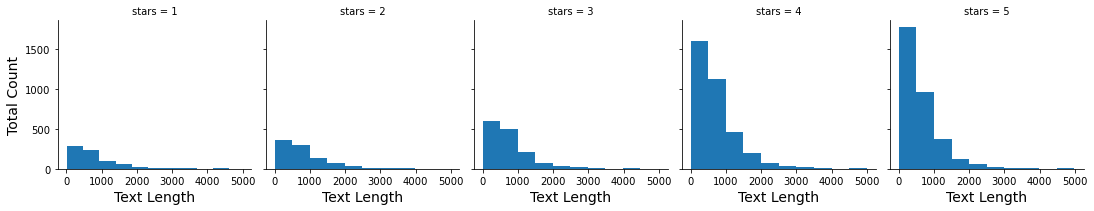

In [39]:
# FacetGrid where we see the total number of reviews versus the text length of the review for each star rating.
# The frequency distributions appear similar, but the total count is almost twice as high for star ratings 4 and 5. 
# Maybe people generally only leave a review if they are satisfied, otherwise they don't bother?
g = sns.FacetGrid(yelp, col='stars')
g = g.map(plt.hist, 'text_length')
g.set_axis_labels("Text Length", "Total Count", fontsize=14);

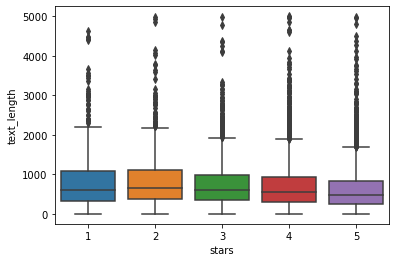

In [47]:
# Boxplot of the text length distribution for each star review
g = sns.boxplot(x="stars", y='text_length', data=yelp);

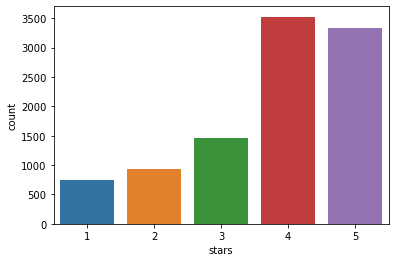

In [51]:
# Total number of reviews for each rating
sns.countplot(x='stars', data=yelp);

In [54]:
# Group by the review star rating to calculate the mean for each
groupby_rating = yelp.groupby(by='stars').mean()
groupby_rating

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [56]:
# Correlations between the features
groupby_rating.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


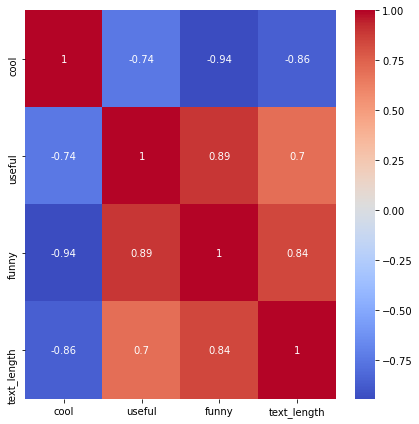

In [107]:
# Heatmap of the correlations:
# Domain knowledge is needed here for interpretations.
plt.figure(figsize=(6,6))
sns.heatmap(groupby_rating.corr(), annot=True, cmap='coolwarm')
plt.tight_layout();

### NLP Classification

In [73]:
# For the classification task we consider only one and five star reviews
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [75]:
X = yelp_class['text'] # feature
y = yelp_class['stars'] # target

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
bow_converter = CountVectorizer()

# From the docs: "Convert a collection of text documents to a matrix of token counts."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# Cf.: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [80]:
X = bow_converter.fit_transform(X)

# Docs: "Learn the vocabulary dictionary and return document-term matrix."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.naive_bayes import MultinomialNB

# Docs:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes
# https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [86]:
# Train the data
nb = MultinomialNB().fit(X_train, y_train)

### Evaluation and Predictions

In [87]:
predictions = nb.predict(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print("Confusion Matrix:")
print()
print(confusion_matrix(predictions,y_test))

Confusion Matrix:

[[159  22]
 [ 69 976]]


In [91]:
print("Classification Report:")
print()
print(classification_report(predictions,y_test))

Classification Report:

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       181
           5       0.98      0.93      0.96      1045

    accuracy                           0.93      1226
   macro avg       0.84      0.91      0.87      1226
weighted avg       0.94      0.93      0.93      1226



### Text Processing using TF-IDF

In [93]:
from sklearn.feature_extraction.text import TfidfTransformer

# Docs: "Transform a count matrix to a normalized tf or tf-idf representation."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [95]:
from sklearn.pipeline import Pipeline

# Docs: https://scikit-learn.org/stable/modules/compose.html

In [97]:
# The Pipeline to be used:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [99]:
# Re-do Splitting data into training and testing set without transformer on X
X = yelp_class['text'] # feature
y = yelp_class['stars'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [100]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [101]:
predictions_pipe = pipeline.predict(X_test)

In [102]:
print("Confusion Matrix:")
print()
print(confusion_matrix(predictions_pipe,y_test))

Confusion Matrix:

[[  0   0]
 [228 998]]


In [104]:
print("Classification Report:")
print()
print(classification_report(predictions_pipe,y_test))

Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.81      0.90      1226

    accuracy                           0.81      1226
   macro avg       0.50      0.41      0.45      1226
weighted avg       1.00      0.81      0.90      1226



C:\Users\Steven\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Steven\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Steven\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__Conclusion__: In this project we attempted to correctly classify review text as either being a one or five star rating. The first attempt used vectorized data with the Naive Bayes classifyer achieving fairly decent scores. Secondly, a pipeline was created but worse results were obtained.